In [41]:
import pandas as pd
import os

In [42]:
path = '/Users/admin/Desktop/pandasproject/SalesAnalysis/Sales_Data'
dfs = []
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

In [43]:
df = pd.concat(dfs, ignore_index=True)

In [44]:
new_path = '/Users/admin/Desktop/pandasproject/mergeddata/sales.csv'
df.to_csv(new_path, index=False)

In [45]:
df = pd.read_csv(r"/Users/admin/Desktop/pandasproject/mergeddata/sales.csv")

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') #converting to a datetime format 


/var/folders/tx/808zmfsn4xs8rdqx8zsdylzc0000gn/T/ipykernel_81168/2889376672.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce') #converting to a datetime format


In [47]:
df = df[df['Order Date'].notna()]

In [48]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [49]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Remove rows with NaT values (if necessary)
df = df.dropna(subset=['Order Date'])


In [50]:
df['Month'] = df['Order Date'].dt.strftime('%B') #adding month column

In [51]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December
...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June


In [52]:
# removing strings from quantity ordered and price

In [53]:
df['Quantity Ordered'] = df['Quantity Ordered'].str.replace(r'[^0-9.]', '', regex=True)

In [54]:
df['Quantity Ordered'] = df['Quantity Ordered'].replace(r'[^0-9.]', '', regex=True)

In [55]:
df['Price Each'] = df['Price Each'].replace(r'[^0-9.]', '', regex=True)

In [56]:
df = df[df['Quantity Ordered']!='']

In [57]:
df = df[df['Price Each']!='']

In [58]:
df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x: int(x))

In [59]:
df['Price Each'] = df['Price Each'].apply(lambda x: float(x))

In [60]:
df['Total Profit'] = df['Price Each'] * df['Quantity Ordered']

In [61]:
df.groupby('Month').agg({'Total Profit':'sum'}) # grouping by month and finding sum of profit for each month

,Total Profit
Month,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73
July,2647775.76
June,2577802.26
March,2807100.38
May,3152606.75


In [62]:
profitable_month = df.groupby('Month').agg({'Total Profit':'sum'}).idxmax()

In [63]:
profitable_month

Total Profit    December
dtype: object

In [64]:
month_profit = df.groupby('Month').agg({'Total Profit':'sum'})

In [65]:
import matplotlib.pyplot as plt

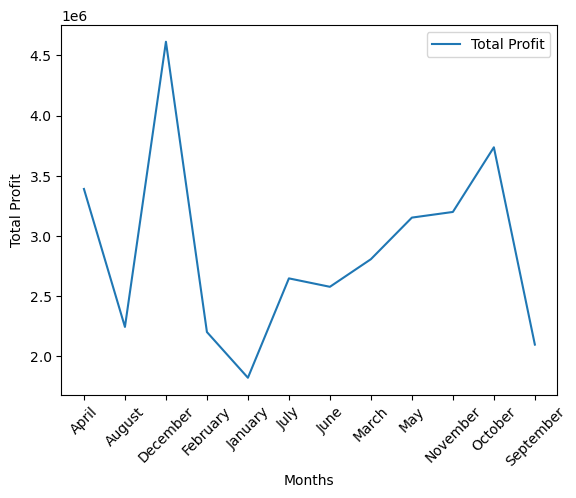

In [66]:
months = month_profit.index.unique()
month_profit.plot(kind='line', xlabel = 'Months', ylabel='Total Profit')
plt.xticks(range(len(months)), months, rotation=45)
plt.show()


In [67]:
# What city had the highest number of sales?

In [68]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Profit
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95


In [69]:
def get_city_state(address):
    vals = address.split(',')
    return f"{vals[1]}, {vals[2]}"

In [70]:
df['Cities with States'] = df['Purchase Address'].apply(lambda x: get_city_state(x))

In [71]:
grouped_frame = df.groupby('Cities with States').agg({'Quantity Ordered':'sum', 'Total Profit': 'sum'})

In [72]:
grouped_frame 

,Quantity Ordered,Total Profit
Cities with States,,
"Atlanta, GA 30301",16602,2795498.58
"Austin, TX 73301",11153,1819581.75
"Boston, MA 02215",22528,3661642.01
"Dallas, TX 75001",16730,2767975.40
"Los Angeles, CA 90001",33289,5452570.80
"New York City, NY 10001",27932,4664317.43
"Portland, ME 04101",2750,449758.27
"Portland, OR 97035",11303,1870732.34
"San Francisco, CA 94016",50239,8262203.91


<Axes: xlabel='Cities with States', ylabel='Total Profit'>

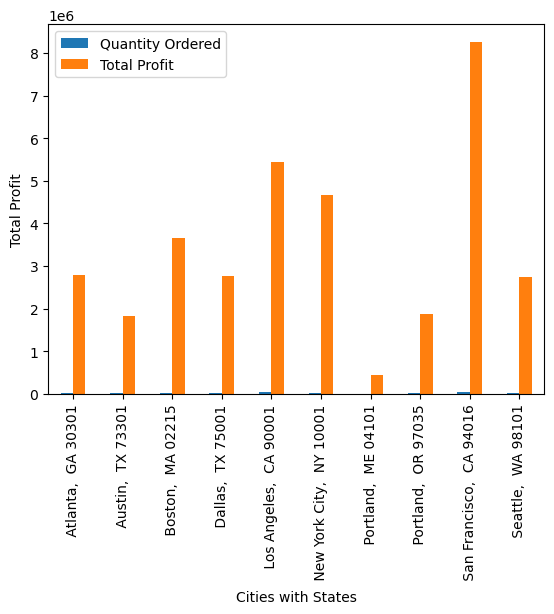

In [73]:
grouped_frame.plot(kind='bar', xlabel='Cities with States', ylabel='Total Profit')

In [74]:
# What time should we dispaly advertisements to maximize likelihood of customer's buying product?

In [75]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Profit,Cities with States
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,"New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,"New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,"New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,"San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,"Atlanta, GA 30301"
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2.99,"Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,149.99,"New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,11.95,"San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,"San Francisco, CA 94016"


In [76]:
df['Time'] = df['Order Date'].dt.strftime('%H:%M:%S')

In [77]:
dftime = df.filter(items=['Time'])
times = dftime['Time'].value_counts()
dftime['Count'] = dftime['Time'].map(times)


In [78]:
dftime = dftime.sort_values(by='Count', ascending=False)
dftime

,Time,Count
152902,11:58:00,252
92219,11:58:00,252
186139,11:58:00,252
12303,11:58:00,252
16107,11:58:00,252
...,...,...
181227,04:05:00,5
7082,04:05:00,5
130099,04:05:00,5
162916,04:05:00,5


In [79]:
# What product are often sold together?

In [87]:
df_duplicated_orders = df[df['Order ID'].duplicated(keep=False)]

In [89]:
df_duplicated_orders['Grouped'] = df_duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/tx/808zmfsn4xs8rdqx8zsdylzc0000gn/T/ipykernel_81168/3582326655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated_orders['Grouped'] = df_duplicated_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [95]:
df_grouped_orders = df_duplicated_orders[['Order ID', 'Grouped']].drop_duplicates()

In [96]:
df_grouped_orders 

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [98]:
from collections import Counter

In [99]:
grouped_sets = df_grouped_orders['Grouped']

In [107]:
counter = Counter(grouped_sets)
most_grouped_set = sorted(counter, key=lambda x: counter[x], reverse=True)[0]
most_grouped_set

'iPhone,Lightning Charging Cable'

In [108]:
 # What product sold the most?

In [143]:
product = df.groupby('Product').agg({'Quantity Ordered':'sum'}).idxmax()
product[0]

/var/folders/tx/808zmfsn4xs8rdqx8zsdylzc0000gn/T/ipykernel_81168/3408007985.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  product[0]


'AAA Batteries (4-pack)'

In [178]:
prices = df.groupby('Product').agg({'Price Each': 'mean'})
prices.reset_index(inplace=True)
df3 = df.groupby('Product').agg({'Quantity Ordered':'sum'})
df3.reset_index(inplace=True)

In [180]:
graph_set = df3.merge(prices, how='left', on='Product')


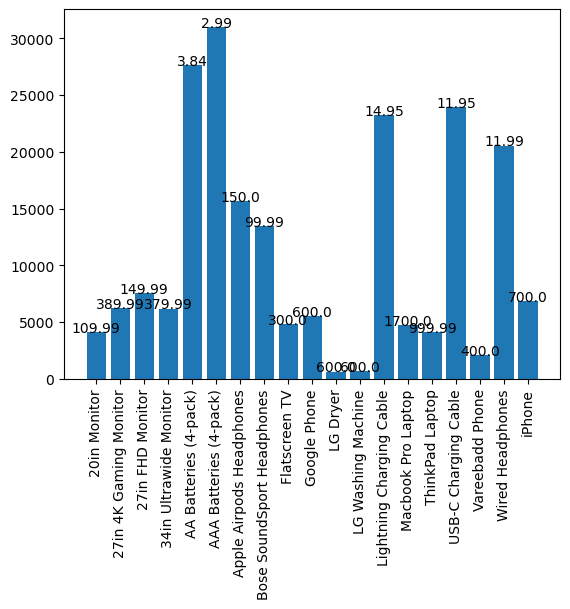

In [184]:
x = graph_set['Product']
y = graph_set['Quantity Ordered']
p = graph_set['Price Each']
ax = plt.bar(x,y)
for x,y,p in zip(x,y,p):
    plt.text(x,y,p, ha='center')
plt.xticks(rotation='vertical')
plt.show()